In [2]:
import matplotlib.pyplot as plt
import numpy as np
import stim 
import pymatching as pm
from qecsim.graphtools import mwpm
import networkx as nx
import sys
sys.path.append("../")
from src.simulations import SurfaceCodeSim

##### Code settings

In [69]:
reps = 3
code_sz = 3
p = 1e-3
n_shots = 1000

sim = SurfaceCodeSim(reps, code_sz, p, n_shots)
detectors, syndromes, flips, _ = sim.generate_syndromes()
detector_dict = sim.detector_indx
detector_dict

{'x': {(1, 0, 1): 4,
  (2, 1, 1): 6,
  (1, 2, 1): 9,
  (2, 3, 1): 11,
  (1, 0, 2): 12,
  (2, 1, 2): 14,
  (1, 2, 2): 17,
  (2, 3, 2): 19},
 'z': {(0, 2, 0): 0,
  (1, 1, 0): 1,
  (2, 2, 0): 2,
  (3, 1, 0): 3,
  (1, 1, 1): 5,
  (3, 1, 1): 7,
  (0, 2, 1): 8,
  (2, 2, 1): 10,
  (1, 1, 2): 13,
  (3, 1, 2): 15,
  (0, 2, 2): 16,
  (2, 2, 2): 18,
  (0, 2, 3): 20,
  (1, 1, 3): 21,
  (2, 2, 3): 22,
  (3, 1, 3): 23}}

##### PyMatching

In [92]:
# test a complete graph
n = 10
g = nx.complete_graph(n)
g.nodes[0]["is_boundary"] = True
g.nodes[1]["is_boundary"] = True
matching = pm.Matching.from_networkx(g)

s = [True, True, False, True, False] * 2
matching.decode_to_edges_array(s)    
# nx.draw(g)

array([[5, 8],
       [3, 6]], dtype=int64)

##### Try out MWPM in QECSIM

In [85]:
# our edges will be of the form:
edges = np.array([[0, 1, 2, 3, 1, 2, 3, 4], [1, 0, 1, 2, 3, 0, 1, 1]])
weights = np.array([0, 2, 4, 12, 4, 21, 7, 6])
edges = {tuple(sorted(x)): w for x, w in zip(edges.T, weights)}
matched_edges = mwpm(edges)

print(edges)
print(matched_edges)
print(f"{type(matched_edges)}")


{(0, 1): 2, (1, 2): 4, (2, 3): 12, (1, 3): 7, (0, 2): 21, (1, 4): 6}
{(0, 1), (2, 3)}
<class 'set'>


In [88]:
x = [1, 2, 3, 4]
x[2:]

[3, 4]

##### Want to count how many edges pass the upper boundary

Distance: 2.00, class: False
Distance: 2.24, class: False
Distance: 6.71, class: True
Distance: 4.12, class: False


(-1.0, 11.0)

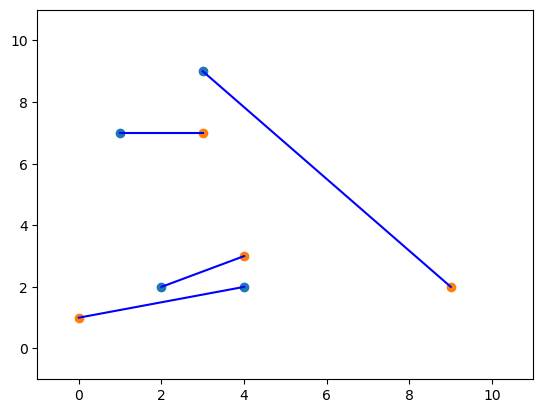

In [18]:
def cylinder_distance(x, y, width, wrap_axis=1, manhattan=False):
    # x, y have coordinates (x, y, t)
    
    ds = np.abs(x - y)
    eq_class = ds[:, wrap_axis] > 0.5 * width
    ds[eq_class, wrap_axis] = width - ds[eq_class, wrap_axis]
    
    if not manhattan:
        return np.sqrt((ds ** 2).sum(axis=1)), eq_class
    else:
        return ds.sum(axis=1), eq_class
    
p1s = np.array([
    [1, 2, 3, 4],
    [7, 2, 9, 2]
])

p2s = np.array([
    [3, 4, 9, 0],
    [7, 3, 2, 1]
])

distances, eq_class = cylinder_distance(p1s.T, p2s.T, 10, manhattan=False)

fig, ax = plt.subplots()
ax.scatter(p1s[0, :], p1s[1, :])
ax.scatter(p2s[0, :], p2s[1, :])
for p1, p2, dist, eq in zip(p1s.T, p2s.T, distances, eq_class):
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], "b")
    print(f"Distance: {dist:.2f}, class: {eq}")
    
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])